## Home task : KNN classification

#### 1. iris dataset

  - load iris dataset

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


 - split to train and test

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

 - train KNN classifiers for different K
 - choose the best K determined on test set

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [5]:
k = 1
k_best = k
cur_score = 0
while k != 50:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    cur_score = knn.score(X_test, y_test)
    
    if k == 1:
        score_best = cur_score
    else:
        if cur_score >= score_best:
            k_best = k
            score_best = cur_score

    k += 1
    
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 32 , score = 0.9736842105263158


#### 2. synthetic dataset

   - generrate synthetic dataset


<IPython.core.display.Javascript object>


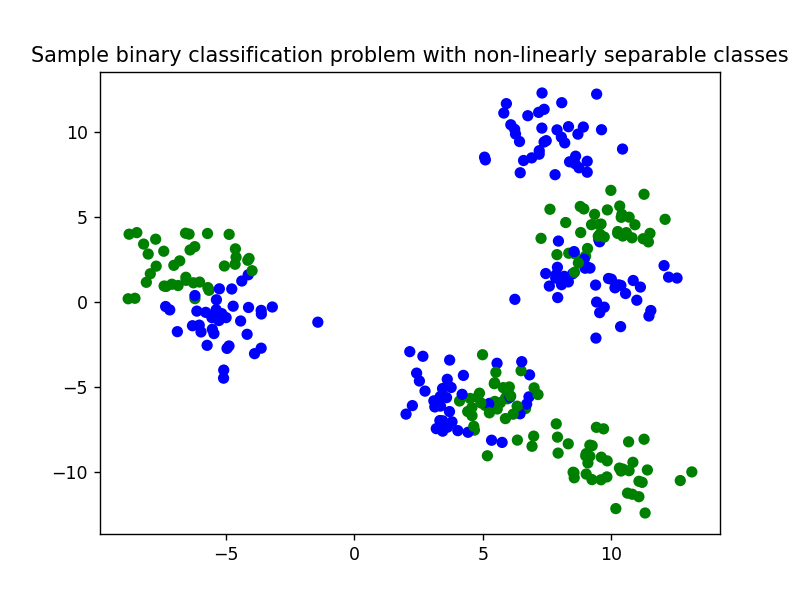

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

 - split ot train and test

In [7]:
X_D2_train, X_D2_test, y_D2_train, y_D2_test = train_test_split(X_D2, y_D2, random_state=0)

 - train KNN regressors for different K
 - choose the best K determined on test set

In [8]:
k = 1
k_best = k
while k != 50:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_D2_train, y_D2_train)
    
    if k == 1:
        score_best = knn.score(X_D2_test, y_D2_test)
    else:
        if knn.score(X_D2_test, y_D2_test) >= score_best:
            k_best = k
            score_best = knn.score(X_D2_test, y_D2_test)

    k += 1
    
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 43 , score = 0.96


 - visualize the decision boundary

In [9]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.01,plot_symbol_size = 50):

    # Create color maps
    from matplotlib.colors import  ListedColormap
    import matplotlib as mpl

    colors_for_areas= [mpl.cm.viridis(.45),mpl.cm.viridis(.6)]
    colors_for_points = [mpl.cm.viridis(.3),mpl.cm.viridis(.75)]
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold  = ListedColormap(colors_for_points)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = precision #.01  # step size in the mesh

    X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Creates grids of values
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))

    # numpy.c_  concatenation along the second axis
    # ravel() Returns a contiguous flattened array.
        # x = np.array([[1, 2, 3], [4, 5, 6]])
        # np.ravel(x) = [1 2 3 4 5 6]
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])# 2-column ndarray # creates the all possible pairs
    # m= target_samples_grid.shape[0]
    # target_samples_grid_1= np.c_[np.ones(shape=(m,1)),target_samples_grid]
    print ('Call prediction for all grid values (precision of drawing = {}, you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    import matplotlib.patches as mpatches
    patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
    plt.legend(handles=[patch0, patch1])
    plt.title(title)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

    plt.show()

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


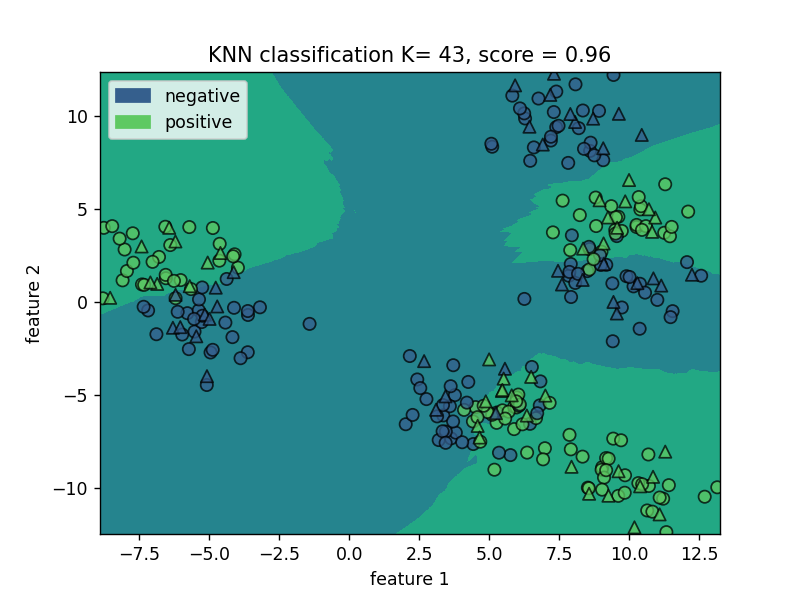

In [10]:
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_D2_train, y_D2_train)
score = knn.score(X_D2_test, y_D2_test)
plot_decision_boundary(knn, X_D2_train, y_D2_train, X_test=X_D2_test, y_test= y_D2_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(k_best, score), 
                               precision=0.01,plot_symbol_size = 50)